# Introduzione

Il disastro del Titanic è uno degli eventi più noti della storia, e l'analisi dei dati relativi ai passeggeri può fornire informazioni utili sulle circostanze che hanno influenzato la loro sopravvivenza.
L'obiettivo principale di questo progetto è costruire un modello di machine learning in grado di prevedere con accuratezza se un passeggero del Titanic sarebbe sopravvissuto o meno, sulla base delle sue caratteristiche individuali.

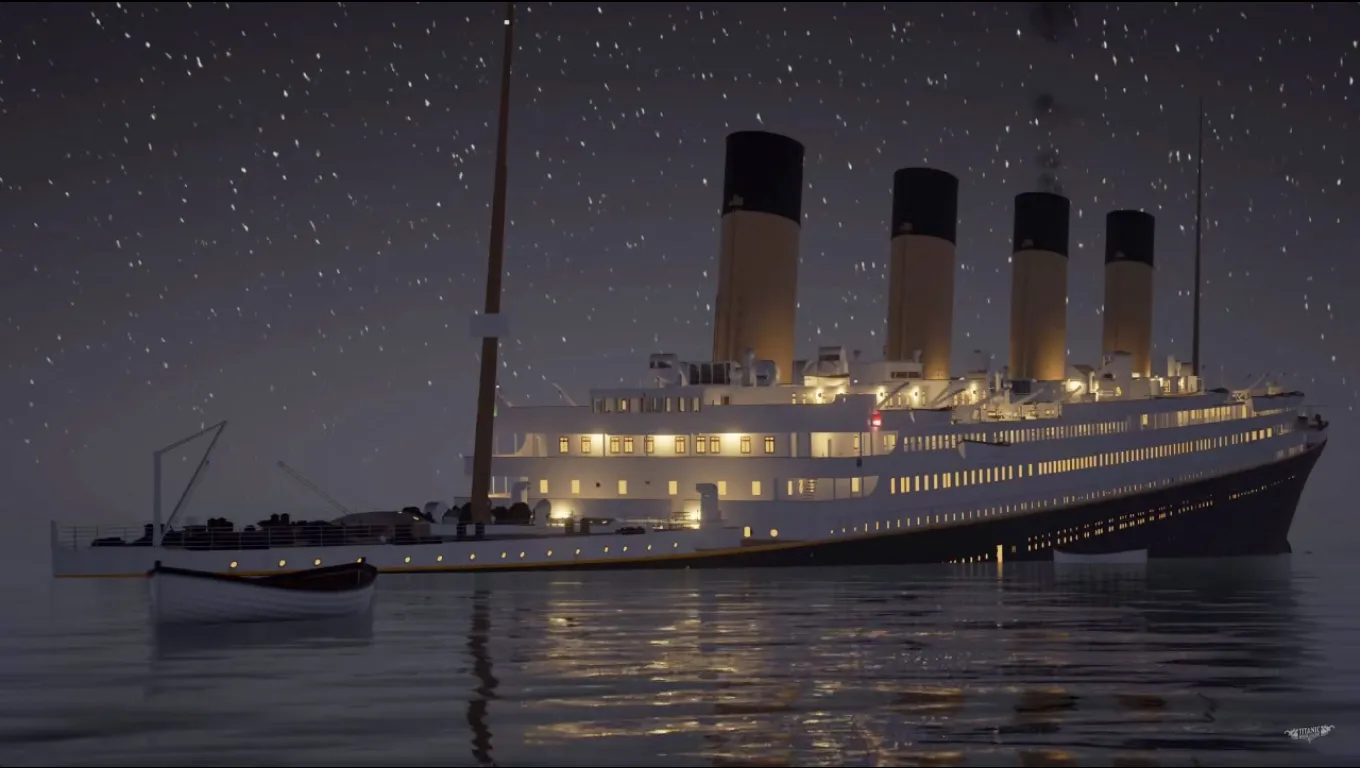

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/titanic_sub.csv', encoding='windows-1254')

# Scelta della variabile per indicizzare il dataframe

 Nel caso del dataset Titanic, la variabile PassengerId sarà utilizzata come indice perchè è un identificativo univoco per ogni passeggero.

In [ ]:
raw_dataset = raw_dataset.set_index('PassengerId')

# Esplorazione del dataset

In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Pclass    891 non-null    int64  
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 41.8+ KB


# Preparazione delle feature

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crea una copia del dataset
dataset = raw_dataset.copy()

# Gestisci i valori mancanti in 'Age' (puoi usare altre strategie se preferisci)
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

# Gestisci i valori mancanti in 'Embarked' (puoi usare altre strategie se preferisci)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Applica Label Encoding a 'Sex' ed 'Embarked'
for feature in ['Sex', 'Embarked']:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature])

# Applica One-Hot Encoding (get_dummies) a 'Sex' ed 'Embarked'
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'],
                             prefix=['Sex', 'Embarked'])



# Separazione del target dalle altre feature del dataset

In un problema di machine learning, è importante separare il target (la variabile che vogliamo prevedere) dalle feature (le variabili che usiamo per fare la previsione). Questo ci permette di addestrare un modello sulle feature e di valutare la sua performance sul target. Andreamo a creare due variabili: y che contiene il target e X che contiene le feature.

In [ ]:
# Definisci le features e la variabile target
X = dataset[['Pclass', 'Age', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2']]
y = dataset['Survived']

# Stampa il dataset risultante
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Survived    891 non-null    int64  
 3   Sex_0       891 non-null    bool   
 4   Sex_1       891 non-null    bool   
 5   Embarked_0  891 non-null    bool   
 6   Embarked_1  891 non-null    bool   
 7   Embarked_2  891 non-null    bool   
dtypes: bool(5), float64(1), int64(2)
memory usage: 32.2 KB


# Train & Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (668, 7)
X_test: (223, 7)
y_train: (668,)
y_test: (223,)


Separiamo ulteriormente il train set in due sottoinsiemi così da avere tre set di dati:

* Training set: X_train, y_train (circa 56.25% dei dati originali)
* Validation set: X_val, y_val (circa 18.75% dei dati originali)
* Test set: X_test, y_test (25% dei dati originali)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (167, 7)
y_val shape: (167,)


# Decision Tree


Valuteremo la **profondità** del modello con diversi valori e ne calcoleremo **l'accuratezza**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = [2, 5, 10, 25, None]

for depth in depths:
    # Crea un'istanza del modello con la profondità corrente
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)

    # Addestra il modello sul training set
    model.fit(X_train, y_train)

    # Fai previsioni sul validation set
    y_pred = model.predict(X_val)

    # Calcola l'accuratezza sul validation set
    accuracy = accuracy_score(y_val, y_pred)

    # Stampa i risultati
    print(f"Profondità: {depth}, Accuratezza: {accuracy}")

Profondità: 2, Accuratezza: 0.7904191616766467
Profondità: 5, Accuratezza: 0.8023952095808383
Profondità: 10, Accuratezza: 0.8023952095808383
Profondità: 25, Accuratezza: 0.8023952095808383
Profondità: None, Accuratezza: 0.8023952095808383


Sembra che  il modello abbia raggiunto la sua massima accuratezza con una profondità di 5 (0.8023) sul validation set. Ora, per ottenere una stima più accurata delle prestazioni del modello su dati non visti, dobbiamo addestrarlo su un set di dati più ampio, che include sia i dati di training che quelli di validation.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Unisci il train e il validation set
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# Crea e addestra il modello finale con profondità 5
final_model = DecisionTreeClassifier(max_depth=5, random_state=0)
final_model.fit(X_train_full, y_train_full)

# Fai previsioni sul test set
y_pred_test = final_model.predict(X_test)

# Calcola l'accuratezza sul test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuratezza sul test set: {accuracy_test}")



Accuratezza sul test set: 0.8026905829596412


Considerazioni sulla precisione del modello:

* Accurancy: il modello è in grado di predire correttamente la sopravvivenza o meno di circa l'80% dei passeggeri nel test set.